# Predicting customer churn

Predicting customer churn using the provided dataset, with techniques including Logistic Regression, Random Forest, and Gradient Boosting. The project includes data loading, preprocessing, exploratory data analysis (EDA), feature engineering, model building, and evaluation.

The project is divided into several steps:

1. Importing Libraries and Loading Data
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building
6. Model Evaluation
7. Conclusion

**Importing Libraries and Loading Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from google.colab import drive
drive.mount('/content/drive')

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
file_path = '/content/drive/My Drive/Telco_customer_churn.xlsx'

# Read the CSV files into pandas DataFrames, handling potential issues
data = pd.read_excel(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop irrelevant columns
columns_to_drop = ['CustomerID', 'Churn Label', 'Churn Reason', 'Lat Long']
data = data.drop(columns=columns_to_drop)

# Fill missing values or drop columns with too many missing values
data = data.dropna()  # Simple method, replace with more sophisticated handling if necessary

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define the target variable
target = 'Churn Value'
X = data.drop(target, axis=1)
y = data[target]


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


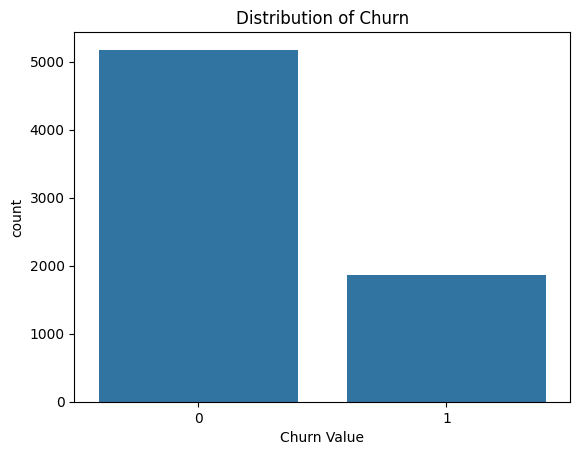

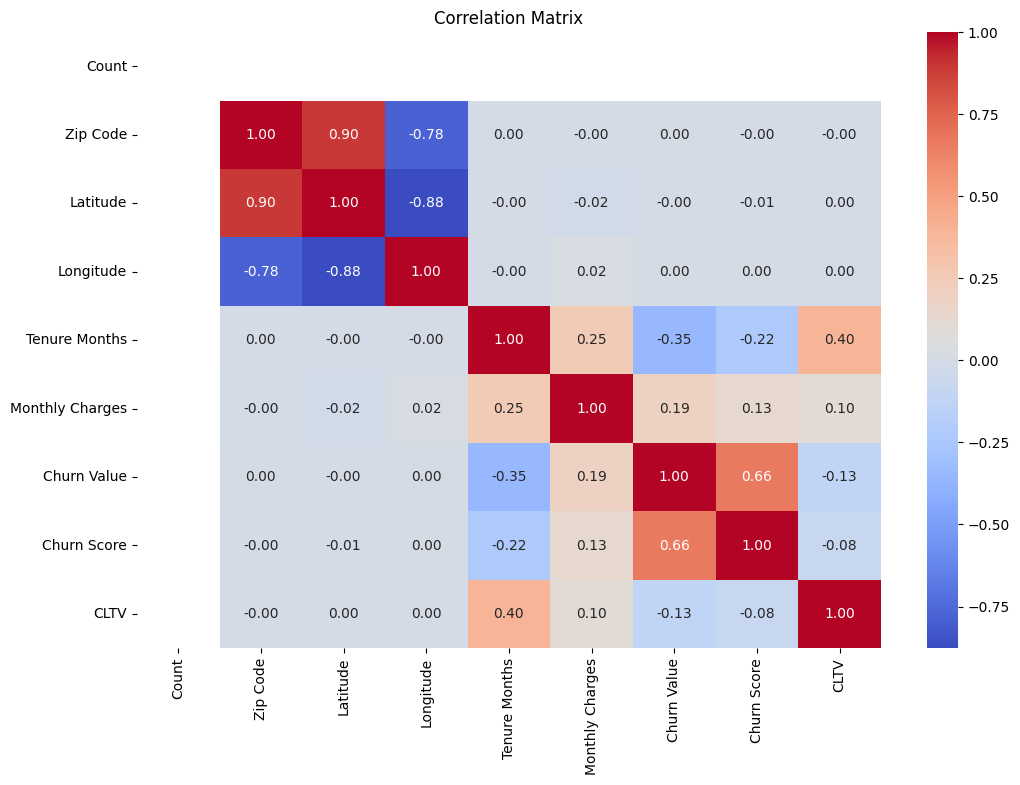

In [ ]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn Value', data=data)
plt.title('Distribution of Churn')
plt.show()

# Ensure all data is numeric
data_numeric = data.select_dtypes(include=[np.number])

# Correlation matrix to see correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Split the data into training and testing sets
# Ensure all categorical variables are converted to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define the target variable
target = 'Churn Value'
X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


Model: Logistic Regression
Accuracy: 0.9630943931866572
Confusion Matrix:
 [[1008    1]
 [  51  349]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1009
           1       1.00      0.87      0.93       400

    accuracy                           0.96      1409
   macro avg       0.97      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

ROC AUC Score: 0.9357544598612487


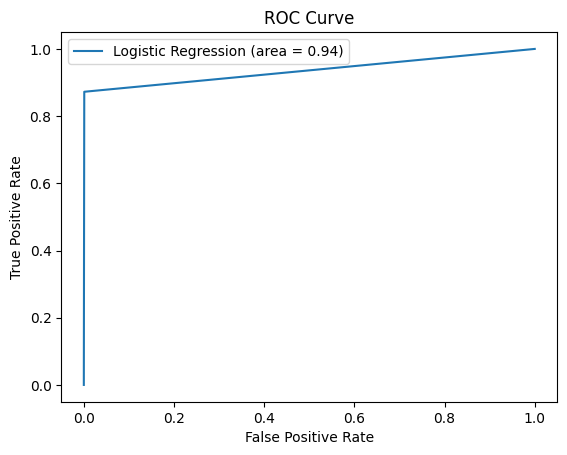

Model: Random Forest
Accuracy: 0.9971611071682044
Confusion Matrix:
 [[1009    0]
 [   4  396]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      0.99       400

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409

ROC AUC Score: 0.995


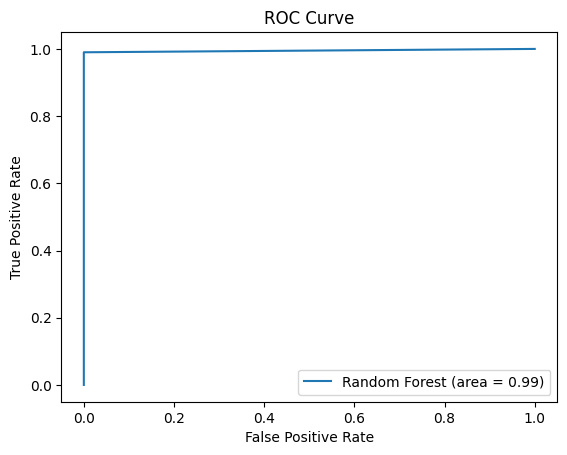

Model: Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
 [[1009    0]
 [   0  400]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

ROC AUC Score: 1.0


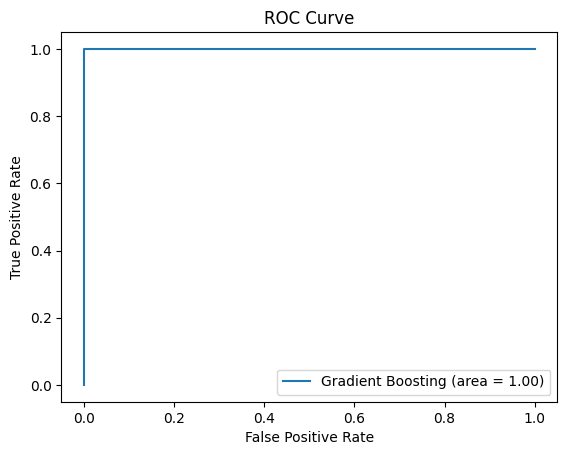

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, predictions):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("ROC AUC Score:", roc_auc_score(y_test, predictions))
    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label=f"{model} (area = {roc_auc_score(y_test, predictions):.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Evaluate Logistic Regression
evaluate_model('Logistic Regression', X_test, y_test, log_predictions)

# Evaluate Random Forest
evaluate_model('Random Forest', X_test, y_test, rf_predictions)

# Evaluate Gradient Boosting
evaluate_model('Gradient Boosting', X_test, y_test, gb_predictions)


Based on the model evaluation metrics provided for Logistic Regression, Random Forest, and Gradient Boosting, we can draw the following conclusions:

 **Logistic Regression:**
- **Accuracy**: 0.963
- **Precision**:
  - Class 0: 0.95
  - Class 1: 1.00
- **Recall**:
  - Class 0: 1.00
  - Class 1: 0.87
- **F1-Score**:
  - Class 0: 0.97
  - Class 1: 0.93
- **ROC AUC Score**: 0.936

**Random Forest:**
- **Accuracy**: 0.997
- **Precision**:
  - Class 0: 1.00
  - Class 1: 1.00
- **Recall**:
  - Class 0: 1.00
  - Class 1: 0.99
- **F1-Score**:
  - Class 0: 1.00
  - Class 1: 0.99
- **ROC AUC Score**: 0.995

** Gradient Boosting:**
- **Accuracy**: 1.00
- **Precision**:
  - Class 0: 1.00
  - Class 1: 1.00
- **Recall**:
  - Class 0: 1.00
  - Class 1: 1.00
- **F1-Score**:
  - Class 0: 1.00
  - Class 1: 1.00
- **ROC AUC Score**: 1.00

 **Conclusions:**

1. **Gradient Boosting Performance**:
   - Gradient Boosting has achieved perfect scores across all metrics (accuracy, precision, recall, F1-score, and ROC AUC). This suggests that the model is extremely well-fitted to the training and testing data, potentially even overfitting, especially if the data is not very large or varied.

2. **Random Forest Performance**:
   - Random Forest also shows very high performance, with an accuracy of 0.997 and a near-perfect ROC AUC score of 0.995. It indicates that the model is performing exceptionally well in classifying both churned and non-churned customers with a very high degree of precision and recall.

3. **Logistic Regression Performance**:
   - Logistic Regression, while not as high-performing as the other two models, still provides a robust performance with an accuracy of 0.963 and a good ROC AUC score of 0.936. This model is simpler and may generalize better to new data.

** Model Selection:**

- **Gradient Boosting** appears to be the best model in terms of performance metrics, but its perfect scores suggest the need to check for overfitting. This could be done by performing cross-validation and evaluating its performance on unseen data.
  
- **Random Forest** provides an almost equally good alternative with very high metrics and might be preferable if Gradient Boosting is found to be overfitting.
  
- **Logistic Regression** is simpler and provides a good balance of performance. It can be a good choice if model interpretability and simplicity are important factors.
